# Bellevue University
## DSC-680 Applied Data Science
### Final Project 01
## Heart Failure Prediction
### Yograj Karki
Date: 07/01/2022

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 

#importing the required libraries for visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Libraries for the model development
# Scaling features
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets, linear_model, metrics

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Loading the data file which is in the working directory
data = pd.read_csv('heart.csv')

# Shape of the data
data.shape

(918, 12)

In [4]:
# Quick peek at the data
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
#check the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#check for null values and duplicates
data.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [7]:
data.duplicated().any()

False

We can see that FastingBS and HeartDisease are binary features [0, 1]. I am going to transform them into categorical variables just for the EDA.

In [8]:
data['FastingBS'] = data['FastingBS'].astype(str)
data['HeartDisease'] = data['HeartDisease'].astype(str)

# Exploratory Data Analysis

In [9]:
# Defining plot design
def plot_design():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=15, color='black')
    plt.xticks(fontsize=15, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=24, color='black')
    plt.tight_layout(pad=5.0)

findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


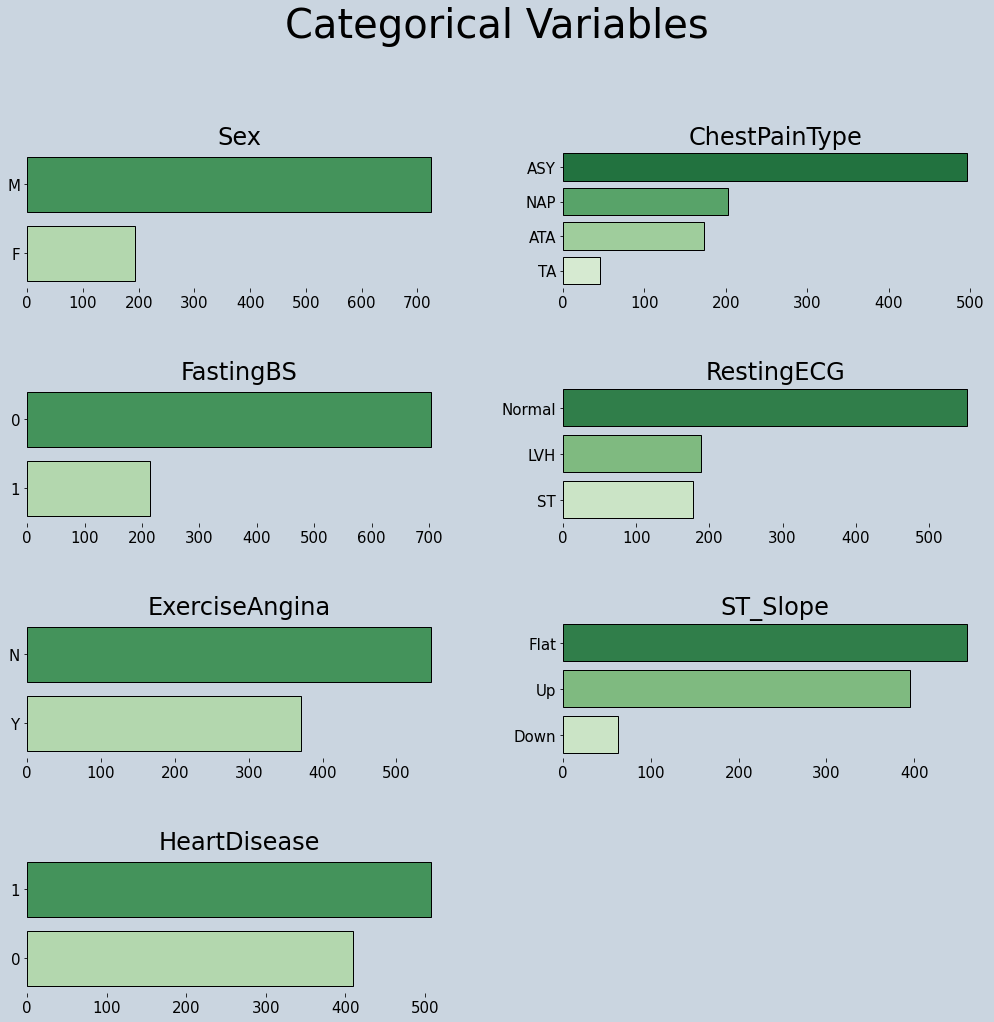

In [10]:
# Select categorical variables
categ = data.select_dtypes(include=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('#CAD5E0')
mpl.rcParams['font.family'] = 'TeX Gyre Heros'


# Loop columns
for i in (enumerate(categ)):
    plt.subplot(4, 2, i[0]+1)
    sns.countplot(y = i[1], data = data, order=data[i[1]].value_counts().index, palette='Greens_r', edgecolor='black')
    plot_design()
    plt.suptitle('Categorical Variables', fontsize=40)

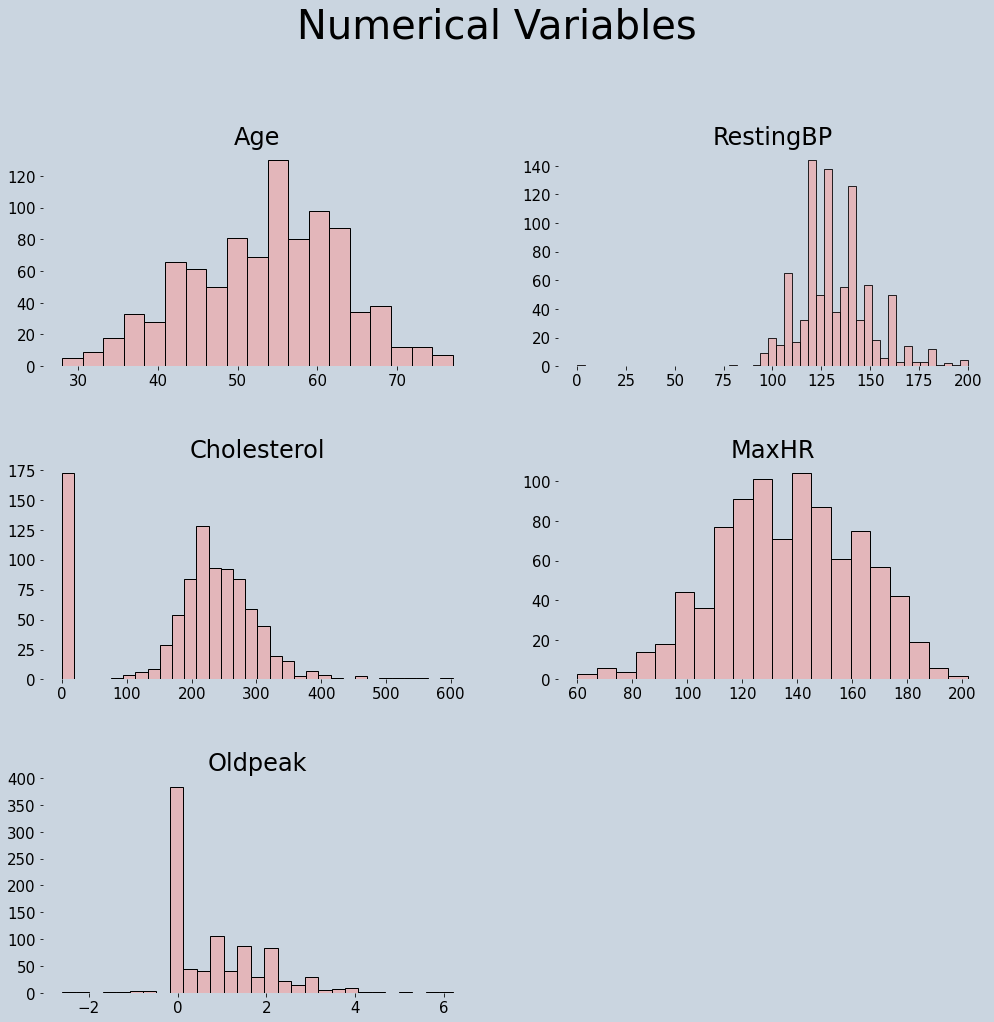

In [11]:
# Select numerical variables
numeric = data.select_dtypes(exclude=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('#CAD5E0')
mpl.rcParams['font.family'] = 'TeX Gyre Heros'

# Loop columns
for i in (enumerate(numeric)):
    plt.subplot(3, 2, i[0]+1)
    sns.histplot(x = i[1], data = data, color='#ECACAE', edgecolor='black')
    plot_design()
    plt.suptitle('Numerical Variables', fontsize=40)

findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


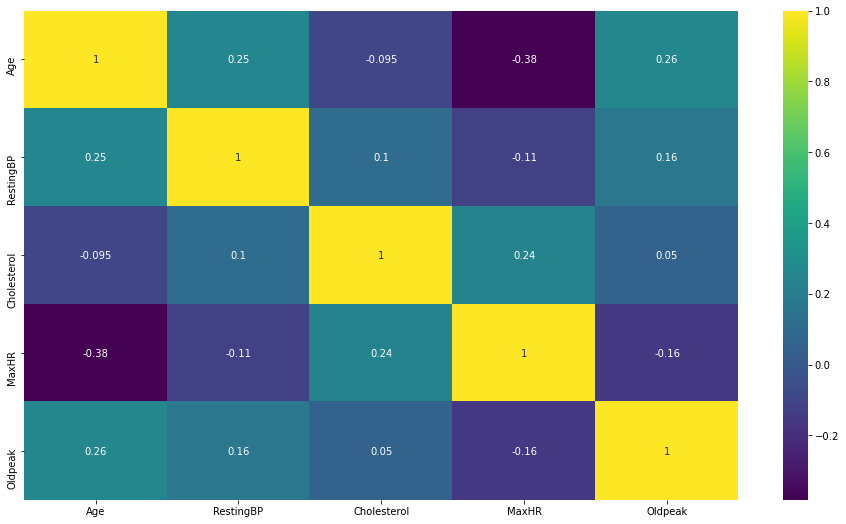

In [12]:
# Heatmap visualization
plt.figure(figsize=(16,9))
x = data.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis = 1)
ax = sns.heatmap(x.corr(),annot = True,cmap = 'viridis')
plt.show()

### Data Preprocessing

As we've already seen above that this dataset does not contain any missing values or duplicated values. So, we can skip this step.

In [13]:
for col in numeric:
    data[col] = MinMaxScaler().fit_transform(data[[col]])

## Outliers

findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


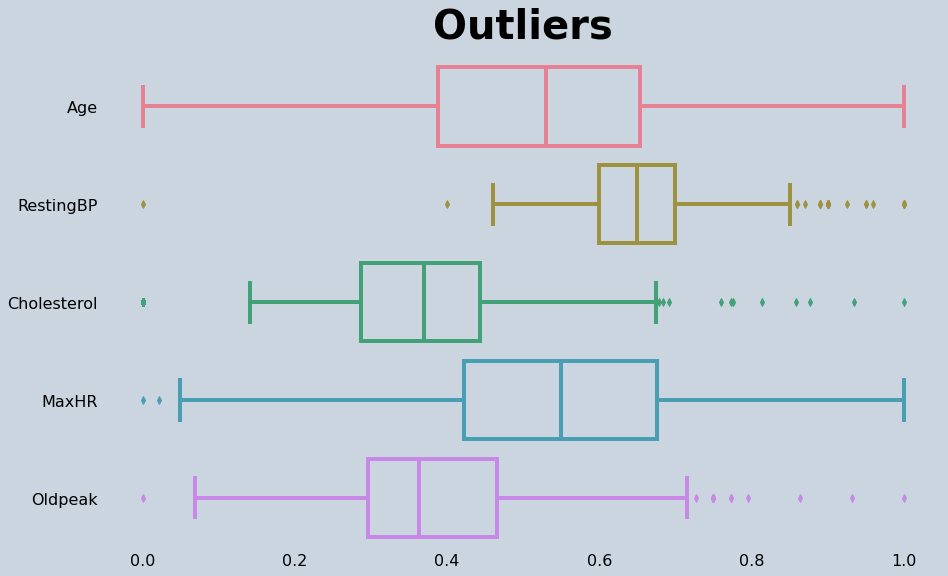

In [14]:
fig, ax = plt.subplots(figsize =(15,9))
ax.patch.set_facecolor('#CAD5E0')
fig.patch.set_facecolor('#CAD5E0')

sns.boxplot(data = data, ax=ax, palette='husl', orient="h", linewidth=4);

# Colors
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
ax.grid(False)

# Change color axis
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

# Title
ax.set_title('Outliers', fontsize=40, fontweight="bold", pad=20);

Age seems okay.

### RestingBP

RestingBP represents the blood pressure of the patient. It is impossible to have values equal to 0; that's why I'll remove the outlier with value 0. It was only one observation.

In [15]:
data = data.drop(data[(data['RestingBP'] == 0)].index)

In [16]:
# Dealing with the outliers (RestingBP)
q1 = data['RestingBP'].quantile(0.25)
q3 = data['RestingBP'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = data[(data['RestingBP'] >= Upper_tail) | (data['RestingBP'] <= Lower_tail)]  # | means "or"
u = pd.DataFrame(u)
print('Outliers on RestingBP:')
u.value_counts(u['HeartDisease'])

Outliers on RestingBP:


HeartDisease
1    17
0    10
dtype: int64

Because the outliers are not extremely imbalanced on HeartDisease, I'll use the median imputation to remove the outliers from this feature.

In [17]:
# Median imputation (RestingBP)
med = np.median(data['RestingBP'])
for i in data['RestingBP']:
    if i > Upper_tail or i < Lower_tail:
            data['RestingBP'] = data['RestingBP'].replace(i, med)

### Cholesterol

In [18]:
# Outliers in Cholesterol
q1 = data['Cholesterol'].quantile(0.25)
q3 = data['Cholesterol'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = data[(data['Cholesterol'] >= Upper_tail) | (data['Cholesterol'] <= Lower_tail)]  # | means "or"
u = pd.DataFrame(u)
print('Outliers on Cholesterol:')
u.value_counts(data['HeartDisease'])

Outliers on Cholesterol:


HeartDisease
1    158
0     25
dtype: int64

In [19]:
# Heart disease status with the people with cholesterol 0
z = data[data['Cholesterol'] == 0]
z = pd.DataFrame(z)
print('Outliers on Cholesterol equal to 0:')
z.value_counts(data['HeartDisease'])

Outliers on Cholesterol equal to 0:


HeartDisease
1    151
0     20
dtype: int64

Important: Almost all of the people with 0 cholesterol have heart disease, so I'll not imputate the outliers equal to 0 in this feature.

In [20]:
# Median imputation (Cholesterol) just on upper tail
med = np.median(data['Cholesterol'])
for i in data['Cholesterol']:
    if i > Upper_tail:
            data['Cholesterol'] = data['Cholesterol'].replace(i, med)

### MaxHR

In [21]:
# Dealing with outliers (MaxHR)
q1 = data['MaxHR'].quantile(0.25)
q3 = data['MaxHR'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = data[(data['MaxHR'] >= Upper_tail) | (data['MaxHR'] <= Lower_tail)]  # | means "or"
u = pd.DataFrame(u)
print('Outliers on MaxHR:')
u.value_counts(data['HeartDisease'])


Outliers on MaxHR:


HeartDisease
1    2
dtype: int64

On MaxHR there are only two outliers. I won't imputate any of them.

### Oldpeak

In [22]:
# Dealing with outliers (Oldpeak)
q1 = data['Oldpeak'].quantile(0.25)
q3 = data['Oldpeak'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = data[(data['Oldpeak'] >= Upper_tail) | (data['Oldpeak'] <= Lower_tail)]  # | means "or"
u = pd.DataFrame(u)
u.value_counts(data['HeartDisease'])

HeartDisease
1    15
0     1
dtype: int64

Almost all of the outliers have heart disease, so it could be important. Just going to leave as it is.

In [23]:
# Changing back the dummies features to numeric 
data['FastingBS'] = data['FastingBS'].astype(int)
data['HeartDisease'] = data['HeartDisease'].astype(int)

# Modeling

## Encoding categorical features

In [24]:
# Select categorical variables
categ = data.select_dtypes(include=object).columns

# One hot encoding
data = pd.get_dummies(data, columns=categ, drop_first=True)  
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,1,1,0,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,1,1,0,0,0,1,0,0,1
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,0,0,0,0,1,0,1,1,0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,1,0,1,0,1,0,0,0,1


### Splitting the data into train and test

In [25]:
# Set up X and y variables
X, y = data.drop(columns='HeartDisease'), data['HeartDisease']

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree Classifier

In [26]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))
print("Classification Report\n", classification_report(y_pred,y_test))

Accuracy score:  0.8116
F1 Score:  0.8385
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       123
           1       0.80      0.88      0.84       153

    accuracy                           0.81       276
   macro avg       0.82      0.80      0.81       276
weighted avg       0.81      0.81      0.81       276



## Random Forest Classifier

In [27]:
RF = RandomForestClassifier(random_state=42, n_estimators=100)
                            
RF = RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))
print("Classification Report\n", classification_report(y_pred,y_test))

Accuracy score:  0.8768
F1 Score:  0.8994
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       107
           1       0.90      0.90      0.90       169

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



### Hyper parameter turning

In [28]:
n_estimators = [100, 150, 200]
max_depth = [15, 20, 25]
max_depth.append(None)
max_features = ['auto', 'sqrt']
min_samples_split = [5, 10, 15]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

params = {'n_estimators': n_estimators, 'max_features': max_features,
          'max_depth': max_depth, 'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

RF = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = RF, 
                           param_grid = params,
                           scoring = 'f1',
                           cv = 5,
                           verbose=0, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print("best score: ", grid_search.best_score_)
print("best param: ", grid_search.best_params_)

best score:  0.8812959007290235
best param:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


In [29]:
best_params = grid_search.best_params_
RF = RandomForestClassifier(random_state=42, **best_params)
                            
RF = RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))
print("Classification Report\n", classification_report(y_pred,y_test))

Accuracy score:  0.8913
F1 Score:  0.9123
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.92      0.90      0.91       173

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276



## Logistic Regression

In [30]:
# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.8841
F1 Score:  0.903


In [31]:
# Fine tuning the logistic regression

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
y_pred = lr_l1.predict(X_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.8949
F1 Score:  0.9124


In [32]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
y_pred = lr_l2.predict(X_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))
print("Classification Report\n", classification_report(y_pred,y_test))

Accuracy score:  0.8986
F1 Score:  0.9157
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       113
           1       0.90      0.93      0.92       163

    accuracy                           0.90       276
   macro avg       0.90      0.89      0.89       276
weighted avg       0.90      0.90      0.90       276



## K-Nearest Neighbor

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))
print("Classification Report\n", classification_report(y_pred,y_test))

Accuracy score:  0.8261
F1 Score:  0.8509
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       123
           1       0.81      0.90      0.85       153

    accuracy                           0.83       276
   macro avg       0.83      0.82      0.82       276
weighted avg       0.83      0.83      0.82       276



#### Determining the optimal number of neighbours¶

In [34]:
max_k = 20
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

#### Let's plot the accuracy of different k values

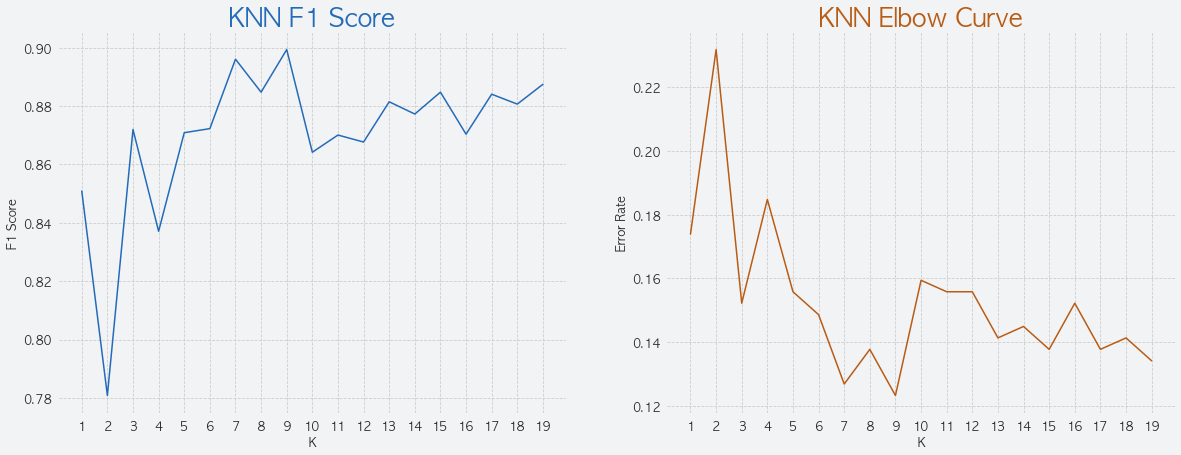

In [35]:
mpl.rcParams['font.size'] = 12
sns.set_style("whitegrid", {'grid.linestyle': '--'})  # set grid
mpl.rcParams['font.sans-serif'] = ['AppleGothic']

fig, (ax_f1, ax_error) = plt.subplots(1, 2, figsize=(20, 7))

fig.patch.set_facecolor('#F1F3F4')
ax_f1.patch.set_facecolor('#F1F3F4')
ax_error.patch.set_facecolor('#F1F3F4')

sns.lineplot(f1_results['K'], f1_results['F1 Score'], color = '#236AB9', ax=ax_f1)
sns.lineplot(error_results['K'], error_results['Error Rate'], color='#B85B14', ax=ax_error)

ax_f1.set_title('KNN F1 Score', color='#236AB9', fontsize= 25)
ax_error.set_title('KNN Elbow Curve', color='#B85B14', fontsize= 25)

# Set xticks range
ax_f1.set_xticks(range(1,20))
ax_error.set_xticks(range(1,20))

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax_f1.spines[i].set_visible(False)

for i in ['top', 'bottom', 'left', 'right']:
    ax_error.spines[i].set_visible(False)

### It seems with the k value of 9, there is highest F1 score and lowest error.

In [36]:
# Now building the model with k=9
knn = KNeighborsClassifier(n_neighbors=9)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

print("\nClassification Report\n", classification_report(y_pred,y_test))

Accuracy score:  0.8768
F1 Score:  0.8994

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       107
           1       0.90      0.90      0.90       169

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



## Adaboost ensemble

In [37]:
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state = 42))

param_grid = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],
              'n_estimators':[140, 150, 160]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='f1',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)
y_pred = GV_ABC.predict(X_test)

print("best param: ", GV_ABC.best_params_)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

best param:  {'learning_rate': 0.025, 'n_estimators': 140}
Accuracy score:  0.9022
F1 Score:  0.9208


In [38]:
print("Classification Report\n", classification_report(y_pred,y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       104
           1       0.93      0.91      0.92       172

    accuracy                           0.90       276
   macro avg       0.89      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276

